**PERDIDOS EN EL ESPACIO**

Imagina que en el futuro una nave espacial tripulada parte de la Tierra hacia el planeta Neptuno.
Durante el viaje, la tripulación permanece en estado de animación suspendida. En el trayecto la nave
sufre una grave avería y el sistema automático de control la dirige al cuerpo celeste más cercano,
donde realiza un aterrizaje de emergencia. Al posarse sobre la superficie, el sistema de soporte vital
de la nave reanima a la tripulación.

Una vez despiertos, los tripulantes descubren que el sistema de posicionamiento espacial no
funciona y por el momento no tienen comunicación con la Tierra ni pueden mirar al exterior de la
nave por razones de seguridad. Así que no saben dónde están, no tienen ningún dato del exterior,
ni posibilidad de conseguirlo, ni saben cuánto tiempo ha pasado.
En su trayecto entre la Tierra y Neptuno han podido estar cerca de la propia Tierra, Marte, Júpiter,
Saturno, Urano, Neptuno y las lunas de cualquiera de ellos.

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import faker 

In [2]:
gravedad = 'Gravedad_planetas.xlsx'
pd.read_excel(gravedad)

,Tierra,Marte,Júpiter,Saturno,Urano,Neptuno
0,9.8,3.7,24.8,9.0,8.7,11.0


a. Con una longitud L = 100m cronometran t = 0.46s. ¿Cuánto vale g y su error? ¿en qué planeta están o pueden estar?



In [16]:
# Usando la ecuación de caída libre
Longitud_a = 1.00
tiempo_a = 0.46
gravedad_a = 2*Longitud_a/(tiempo_a**2)


# el error se calcula
delta_ga = np.sqrt((4*0.01/tiempo_a**2)**2 + (4*Longitud_a*0.01/tiempo_a**4)**2)

pd.DataFrame({'Gravedad': [gravedad_a], 'Intervalo de error': [delta_ga]}, index = ['Valor'])




,Gravedad,Intervalo de error
Valor,9.451796,0.913145


Viendo que la gravedad obtenida es, dredondeando, 9,45 m/s^2; y el margen de error es de 0.91, podemos deducir que el planeta dónde se ha realizado el experimento puede ser la Tierra o Saturno. En concrero está mas cerca de ser la Tierra.

b. Con una longitud L = 2.00 m cronometran t = 0.66s. ¿Cuánto vale g y su error? ¿En que planeta están, o pueden estar?

In [17]:
Longitud_b = 2.00
tiempo_b = 0.66
gravedad_b = 2*Longitud_b/(tiempo_b**2)

delta_gb = np.sqrt((4*0.01/tiempo_b**2)**2 + (4*Longitud_b*0.01/tiempo_b**4)**2)

pd.DataFrame({'Gravedad': [gravedad_b], 'Intervalo de error': [delta_gb]}, index = ['Valor'])

,Gravedad,Intervalo de error
Valor,9.182736,0.431497


En este segundo experimento observamos que los resultados concuerdan con la gravedad de Saturno, y no llegamos ni a considerar estar en la Tierra ya que con el intervalo de error no llegamos a la gravedad de la misma.

GENERACIÓN DE DATASET

Generamos un dataset con número aleatorios uniformes para ver con que frecuencia estamos en cada uno de los planetas.

In [19]:
def  generar_muestra():
    Longitud = round(random.uniform(0.8, 2.5), 2)
    tiempo = round(random.uniform(0.4, 0.7), 2)
    gravedad_calculada = round(2 * Longitud / (tiempo ** 2), 2)

    if abs(gravedad_calculada - 9.8) < abs(gravedad_calculada - 9):
        planeta_probable = "Tierra"
        segundo_probable = "Saturno"

    elif abs(gravedad_calculada - 9) < abs(gravedad_calculada - 9.8):
        planeta_probable = "Saturno"
        segundo_probable = "Tierra"
    else:
        pass


    return{
        "Longitud (m)": Longitud,
        "Tiempo (s)": tiempo,
        "Gravedad Calculada (m/s^2)": gravedad_calculada,
        "Planeta más Probable": planeta_probable,
        "Segundo más probable": segundo_probable,
    }

dataset = [generar_muestra() for _ in range(100)]

df =pd.DataFrame(dataset)
pd.DataFrame(dataset)

#df.loc[df ["Planeta más Probable"] == "Tierra"]

,Longitud (m),Tiempo (s),Gravedad Calculada (m/s^2),Planeta más Probable,Segundo más probable
0,1.16,0.64,5.66,Saturno,Tierra
1,1.81,0.64,8.84,Saturno,Tierra
2,0.89,0.59,5.11,Saturno,Tierra
3,1.46,0.54,10.01,Tierra,Saturno
4,1.87,0.63,9.42,Tierra,Saturno
...,...,...,...,...,...
95,1.35,0.52,9.99,Tierra,Saturno
96,1.98,0.50,15.84,Tierra,Saturno
97,1.02,0.69,4.28,Saturno,Tierra
98,1.46,0.68,6.31,Saturno,Tierra


GRÁFICAS

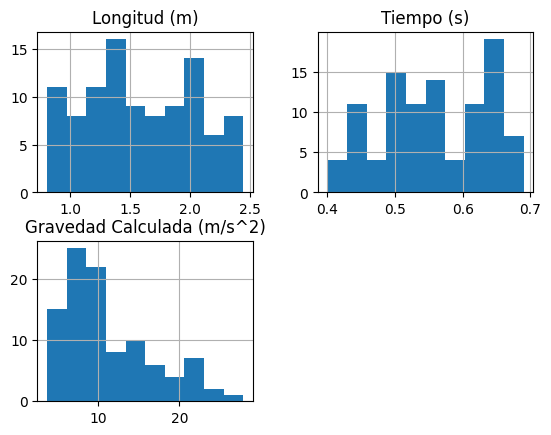

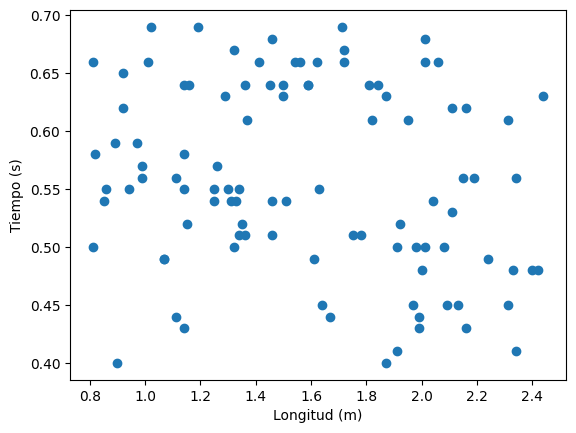

                            Longitud (m)  Tiempo (s)   
Longitud (m)                    1.000000   -0.215256  \
Tiempo (s)                     -0.215256    1.000000   
Gravedad Calculada (m/s^2)      0.754190   -0.760796   
Planeta más Probable            0.663170   -0.631025   
Segundo más probable           -0.663170    0.631025   

                            Gravedad Calculada (m/s^2)  Planeta más Probable   
Longitud (m)                                  0.754190              0.663170  \
Tiempo (s)                                   -0.760796             -0.631025   
Gravedad Calculada (m/s^2)                    1.000000              0.771606   
Planeta más Probable                          0.771606              1.000000   
Segundo más probable                         -0.771606             -1.000000   

                            Segundo más probable  
Longitud (m)                           -0.663170  
Tiempo (s)                              0.631025  
Gravedad Calculada (m/s^2)   

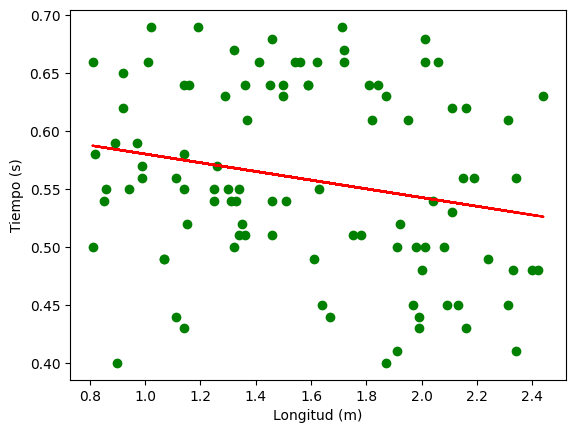

In [20]:
# histogramas
df.hist(column=["Longitud (m)", "Tiempo (s)", "Gravedad Calculada (m/s^2)"])
plt.show()

# diagrama de dispersión
plt.scatter(df["Longitud (m)"], df["Tiempo (s)"])
plt.xlabel("Longitud (m)")
plt.ylabel("Tiempo (s)")
plt.show()

# Ccodificar etiquetas de planetas
label_encoder = LabelEncoder()
df["Planeta más Probable"] = label_encoder.fit_transform(df["Planeta más Probable"])
df["Segundo más probable"] = label_encoder.fit_transform(df["Segundo más probable"])

# correlación entre variables
print(df.corr())

# regresión lineal
from sklearn.linear_model import LinearRegression

X = df["Longitud (m)"].values.reshape(-1, 1)
y = df["Tiempo (s)"].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# gráfico de regresión lineal
plt.scatter(X, y, color="green")
plt.plot(X, y_pred, color="red")
plt.xlabel("Longitud (m)")
plt.ylabel("Tiempo (s)")
plt.show()

 quitar los valores negativos!